In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
import cv2

In [2]:
file_names = os.listdir(r"./images")
file_names = ["./images/" + name for name in file_names]
images = [cv2.imread(path) for path in file_names]
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]
images = np.array(images, dtype = object)

## 1. Displaying Image

Text(0.5, 1.0, 'Image')

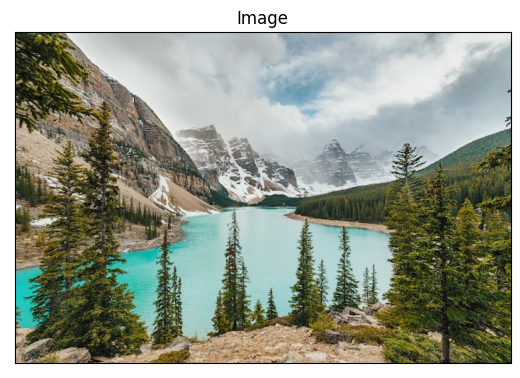

In [3]:
plt.imshow(images[1])
plt.xticks([])
plt.yticks([])
plt.title("Image")

## 2. Different Color models

([], [])

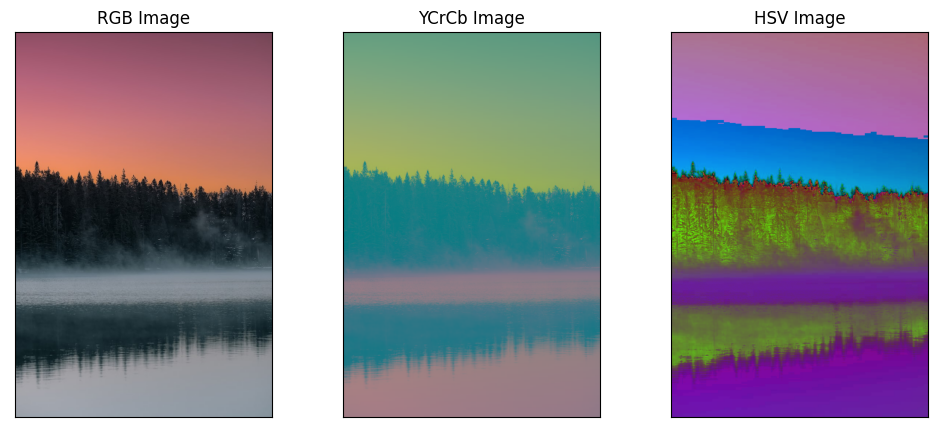

In [4]:
img = images[13]
ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

# Convert the image to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(12, 5))
# Show the original RGB image
plt.subplot(131), plt.imshow(img)
plt.title('RGB Image')
plt.xticks([])
plt.yticks([])

# Show the YCrCb image
plt.subplot(132), plt.imshow(ycrcb)
plt.title('YCrCb Image')
plt.xticks([])
plt.yticks([])

# Show the HSV image
plt.subplot(133), plt.imshow(hsv)
plt.title('HSV Image')
plt.xticks([])
plt.yticks([])

## 3. Image Color Space

In [5]:
def getColorSpace(image):
    # reshape image 
    flat_img = image.reshape(-1, image.shape[-1])
    # Obtain A color only once
    unique_colors = np.unique(flat_img, axis = 0)
    return unique_colors


Text(0.5, 0.92, 'Color Space')

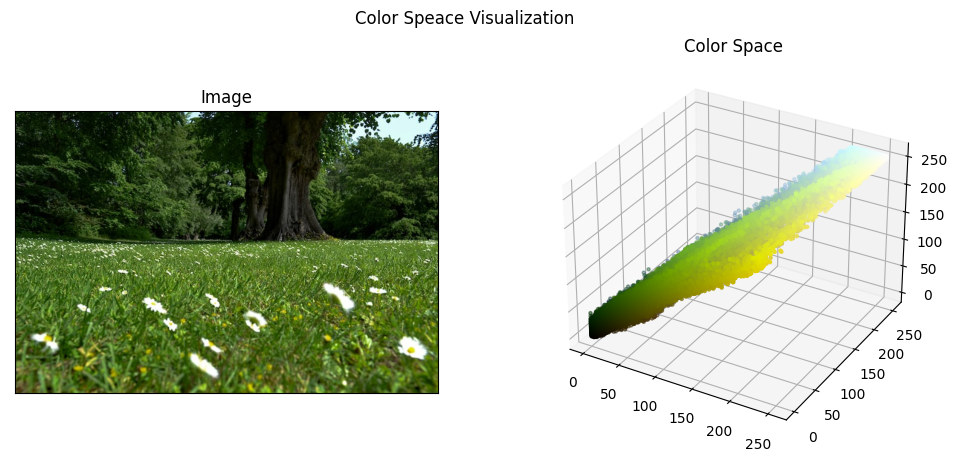

In [6]:
image = images[2]

fig = plt.figure(figsize=(12, 5))
fig.suptitle('Color Speace Visualization')

# First subplot
ax = fig.add_subplot(1, 2, 1)
ax.imshow(image)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Image")

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
unique_colors = getColorSpace(image)
red = unique_colors[:, 0]
green = unique_colors[:, 1]
blue = unique_colors[:, 2]
c = unique_colors/255
surf = ax.scatter(red, blue, green, c = c, marker = ".")
ax.set_title("Color Space")

## 4. Image Color Histogram

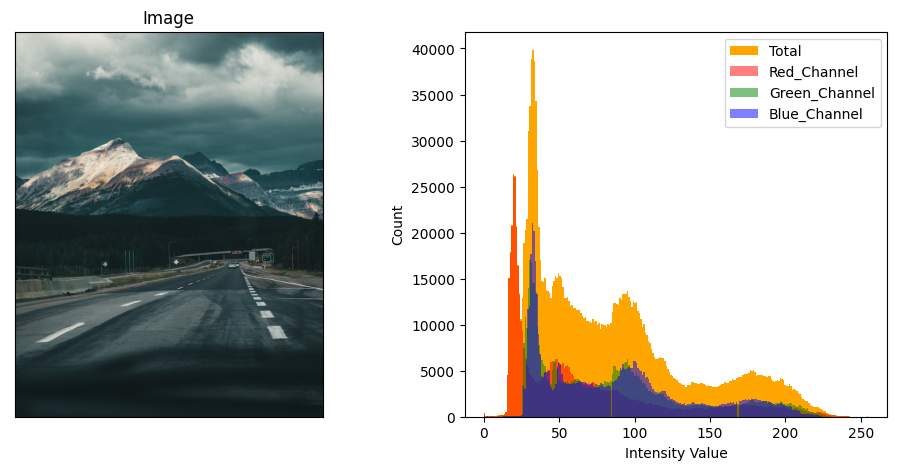

In [7]:
image = images[3]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title("Image")

plt.subplot(1, 2, 2)

plt.hist(image.ravel(), bins = 256, color = 'orange', )
plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])

## 5. Edges

([], [])

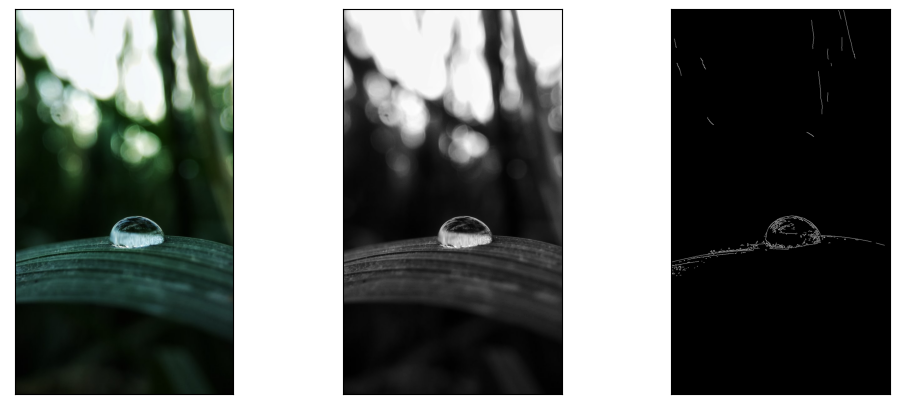

In [8]:
image = images[7]
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray,150,200)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.xticks([])
plt.yticks([])


## 6. Keypoints

([], [])

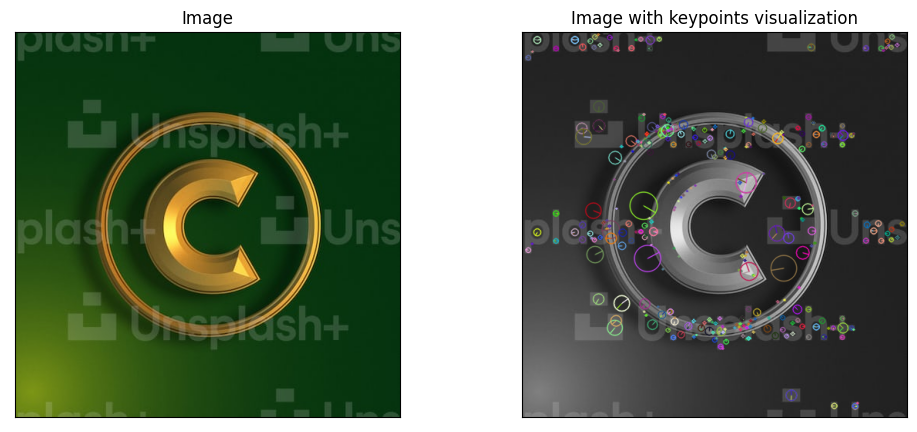

In [9]:

image = images[14]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Detect keypoints using SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw the keypoints on the image
img_keypoints = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show the image with keypoints using Matplotlib
plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Image with keypoints visualization")
plt.xticks([])
plt.yticks([])

## 7. Entropy

Text(0.5, 1.0, 'Entropy with disk size 10')

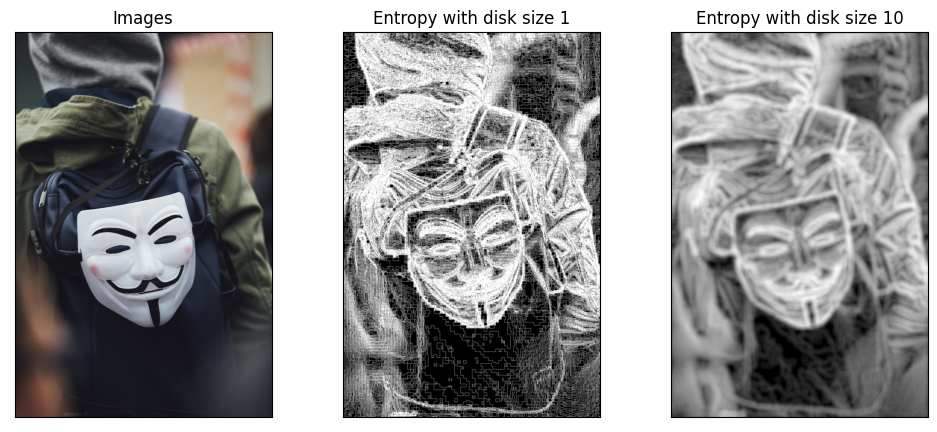

In [10]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Load the image
img = images[5]
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Images")
plt.xticks([])
plt.yticks([])
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


plt.subplot(1, 3, 2)

# Calculate the entropy

img_entropy = entropy(img, disk(1))

# Plot the entropy
plt.imshow(img_entropy, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Entropy with disk size 1")

img_entropy = entropy(img, disk(10))

plt.subplot(1, 3, 3)
plt.imshow(img_entropy, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Entropy with disk size 10")